# Data EDA

In [1]:
%matplotlib inline
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# load the provided data
train_features = pd.read_csv('data/dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('data/dengue_labels_train.csv',
                           index_col=[0,1,2])

In [3]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

In [4]:
print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [5]:
sj_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
year weekofyear                                                       
1990 18                     297.742857                   292.414286   
     19                     298.442857                   293.951429   
     20                     298.878571                   295.434286   
     21                     299.228571                   295.310000   
     22                     299.664286                   295.821429   

                 reanalysis_max_air_temp_k  ...  \
year weekofyear                             ...   
1990 18                              299.8  ...   
     19                              300.9  ...   
     20                              300.5  ...   
     21                              301.4  ...   
     22                              301.9  ...   

                 reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                    
1990 18                                    32.00   
     19                                    17.94   
     20                                    26.10   
     21                                    13.90   
     22                                    12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weeko

In [6]:
# Remove `week_start_date` string.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

In [7]:
# Null check
pd.isnull(sj_train_features).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

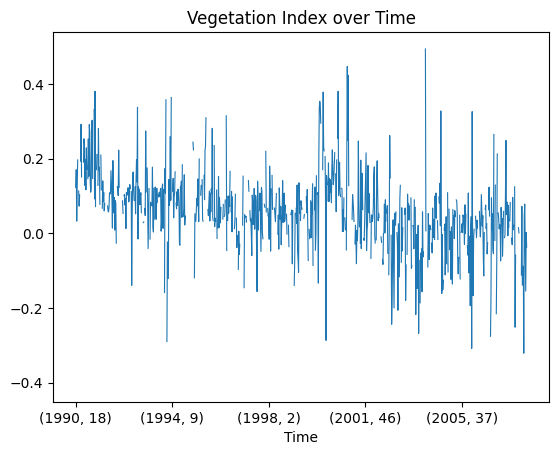

In [8]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')
plt.show()

In [9]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

# Distribution of labels

In [10]:
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.0454396910277

Iquitos
mean:  7.565384615384615
var : 115.89552393656439


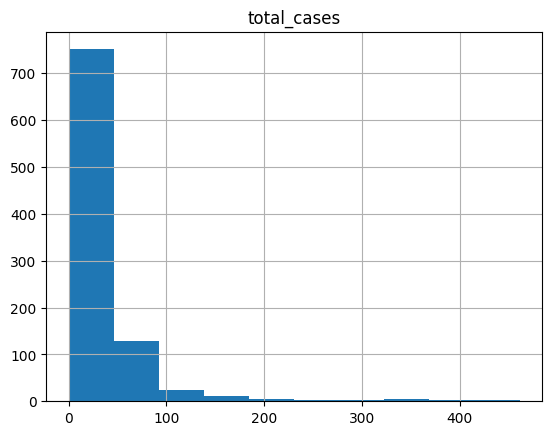

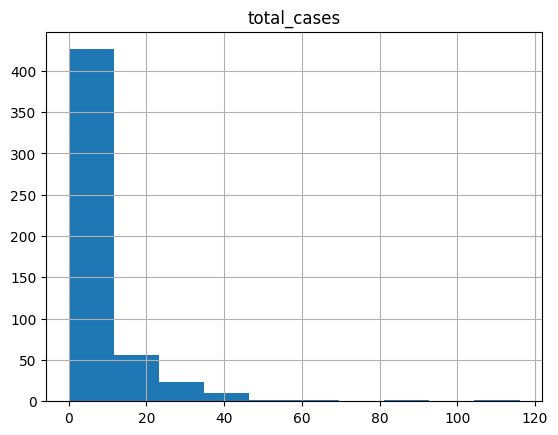

In [11]:
sj_train_labels.hist()
plt.show()
iq_train_labels.hist()
plt.show()

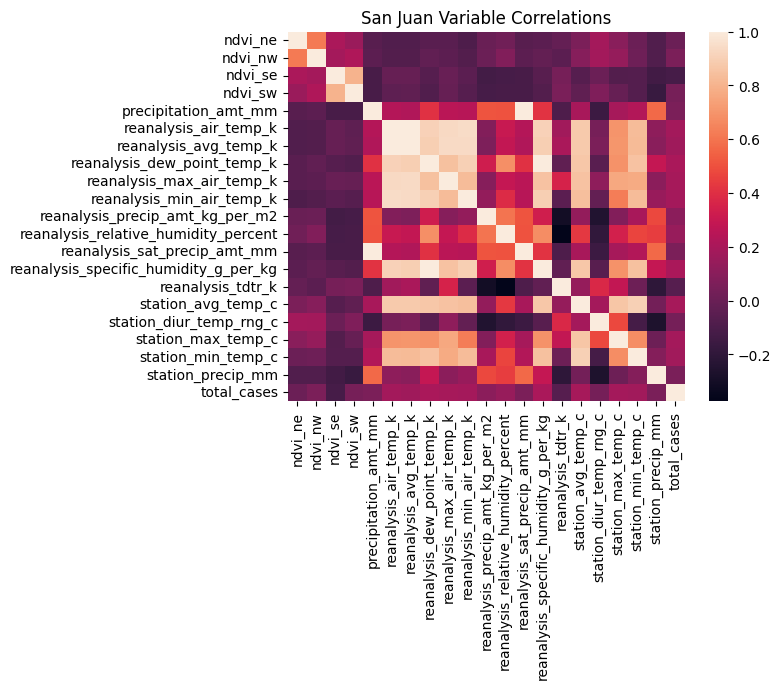

In [12]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')
plt.show()

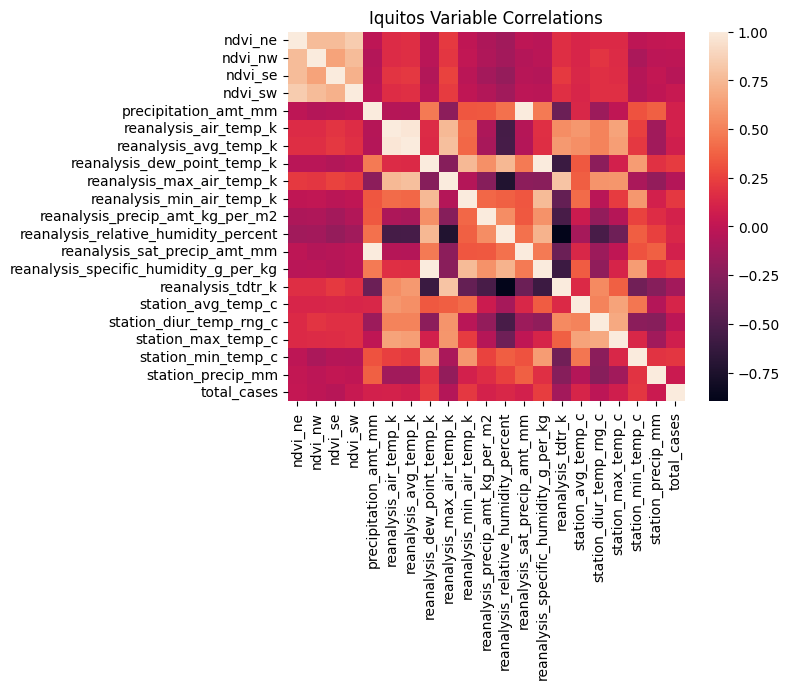

In [13]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')
plt.show()

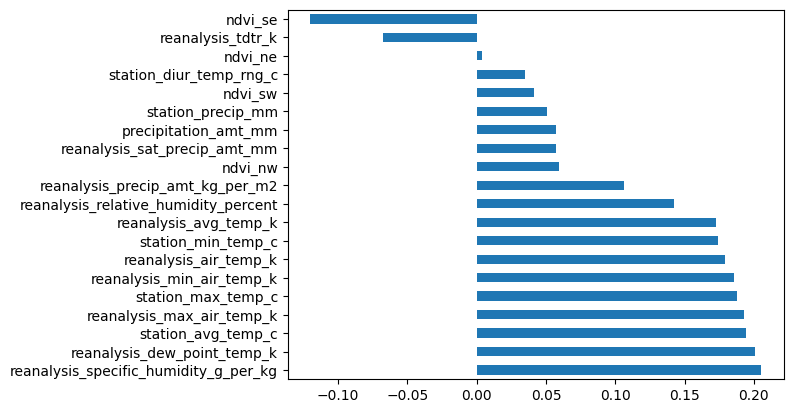

In [14]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

plt.show()

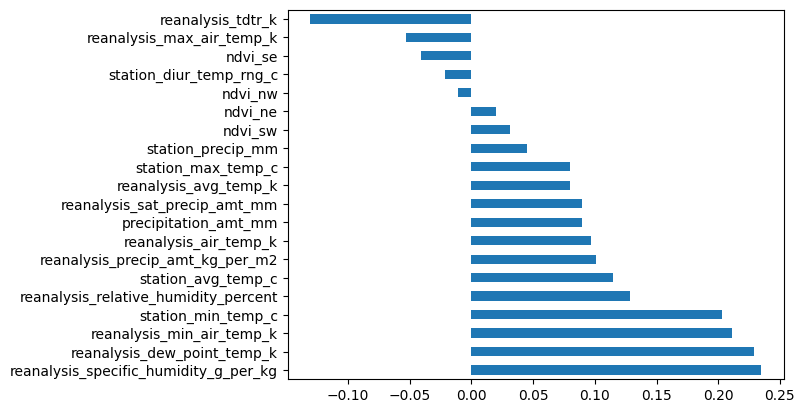

In [15]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())
plt.show()

In [36]:
def preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['week_start_date','reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
            'station_avg_temp_c', 'station_min_temp_c']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    return df

In [37]:
from sklearn.preprocessing import LabelEncoder
def DF_change(df):
    df = df.reset_index()
    le = LabelEncoder()
    df['city'] = le.fit_transform(df['city'])
    df['week_start_date'] = pd.to_datetime(df['week_start_date'])  # Convert to datetime format
    df['month'] = df['week_start_date'].dt.month
    df['day'] = df['week_start_date'].dt.day
    df = df.drop(columns = 'week_start_date' )
    return df
df = preprocess_data('data/dengue_features_train.csv',
                                    labels_path="data/dengue_labels_train.csv")
df = DF_change(df)


In [40]:
df.shape

(1456, 10)

In [41]:
#split
train_df = df.head(1000)
test_df = df.tail(df.shape[0] - 1000) #936-800 = 136

# iq_train_subtrain = iq_train.head(400)
# iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0135 - val_loss: 9.0829e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - val_loss: 6.8752e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - val_loss: 7.6667e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - val_loss: 6.7413e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - val_loss: 6.0251e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - val_loss: 6.4544e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - val_loss: 5.9413e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 6.0138e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - val_loss: 6.1902e-04
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - val_loss: 6.0345e-04
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032 - val_loss: 6.3650e-04
Epoch 12/50
62/62 ━━━━━━━━━━━━

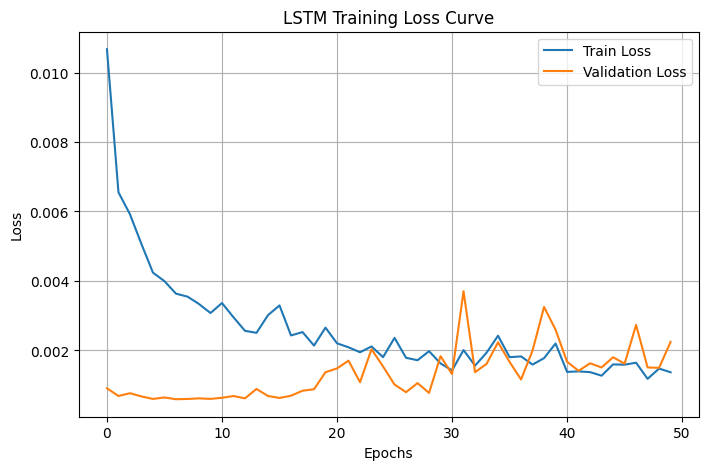

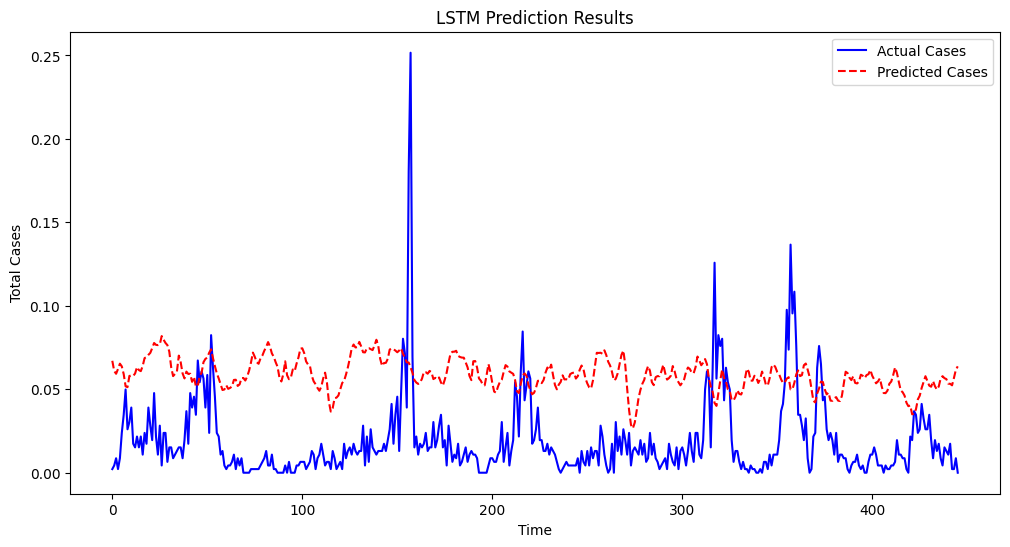

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 確保數據按照時間順序排列
train_df = train_df.sort_values(by=["year", "weekofyear"])
test_df = test_df.sort_values(by=["year", "weekofyear"])


# 選擇要預測的目標變數
target = ['total_cases']
X_train = train_df.drop(columns=target).values
y_train = train_df[target].values
X_test = test_df.drop(columns=target).values
y_test = test_df[target].values

# 標準化數據
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 轉換為 3D 時序格式 (samples, time steps, features)
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10  # 設定時序窗口大小
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

# 構建 LSTM 模型
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, X_train.shape[1])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # 預測值輸出層
])

model.compile(optimizer='adam', loss='mse')

# 訓練模型
history = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=16, validation_data=(X_test_seq, y_test_seq))

# 預測
y_pred = model.predict(X_test_seq)

# 視覺化損失曲線
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LSTM Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

# 視覺化預測結果
plt.figure(figsize=(12, 6))
plt.plot(y_test_seq, label="Actual Cases", color='blue')
plt.plot(y_pred, label="Predicted Cases", color='red', linestyle='dashed')
plt.xlabel("Time")
plt.ylabel("Total Cases")
plt.title("LSTM Prediction Results")
plt.legend()
plt.show()


In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
def preprocess_data_test(file_path):
    # Load the test data
    df_test = pd.read_csv(file_path)
    df_test = DF_change(df_test)
    # Ensure all necessary features are present
    features = ['city', 'year', 'weekofyear','reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
                'station_avg_temp_c', 'station_min_temp_c', 'month', 'day']
    # fill missing values
    df_test.fillna(method='ffill', inplace=True)
    missing_features = [col for col in features if col not in df_test.columns]
    if missing_features:
        raise KeyError(f"以下特徵遺失於測試數據: {missing_features}")
    
    # Transform the data using the same scaler used for training
    X_test = df_test[features]

    
    return X_test, df_test
# ✅ 預處理測試數據
test_X, df_test = preprocess_data_test("data/dengue_features_test.csv")

# 確保輸入形狀正確
print("Test X shape:", test_X.shape)  # (samples, time_steps, features)

# ✅ 進行 LSTM 預測
test_X_seq, y_test_seq = create_sequences(test_X, y_test, time_steps)
# 確保 test_X_seq 有足夠的 padding，使其長度與 submission 相同
X_test_seq_padded = pad_sequences(test_X_seq, maxlen=time_steps, padding='pre', dtype='float32')
y_pred = model.predict(X_test_seq_padded)
# 確保 y_pred 的長度與 submission 一致
if len(y_pred) < len(submission):
    padding = np.full((len(submission) - len(y_pred), 1), np.nan)  # 用 NaN 填充
    y_pred_full = np.vstack([padding, y_pred])
else:
    y_pred_full = y_pred[:len(submission)]  # 裁剪多餘的數據

# 更新 submission
submission = pd.read_csv("data/submission_format.csv", index_col=[0, 1, 2])
submission["total_cases"] = y_pred_full.flatten()
first_valid_value = submission["total_cases"].dropna().iloc[0]  # 取得第一個非空值
submission["total_cases"] = submission["total_cases"].fillna(first_valid_value)
submission["total_cases"] = submission["total_cases"].round().astype(int)
submission.to_csv("data/benchmark.csv")

print("✅ 預測完成，已儲存為 data/benchmark.csv")

Test X shape: (416, 9)
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
✅ 預測完成，已儲存為 data/benchmark.csv


In [ ]:
#25.8173